In [30]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.colors as mcolors
sys.path.append('..')
from telescope_simulator import TelescopeSimulator
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 18

In [31]:
img_test = cv2.imread(r'..\tele_datasets\224\20240108150051_8a66f47491e84cc691f6517d5014f3fd.png', 0)
img_test.shape

(224, 224)

In [32]:
cmap_test = Path('cmap_test')
cmap_test.mkdir(exist_ok=True)

In [33]:
# cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
#         ]
# for cmap in cmaps:
#     plt.imshow(img_test, cmap=cmap);
#     plt.savefig(cmap_test / cmap, dpi=300)

In [34]:

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

In [35]:
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


In [36]:
hex_list = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
cmap = get_continuous_cmap(hex_list)

In [37]:
init_size = 224
upper_size = 1024

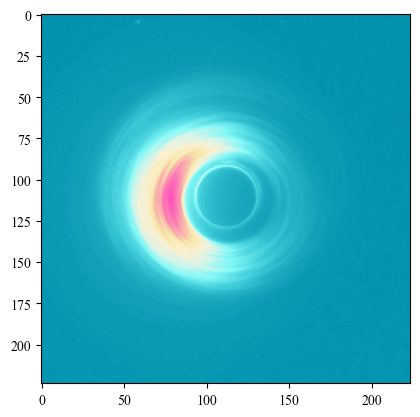

In [38]:
# img_test = cv2.imread(r'papershow/26.png', 0)
img_test = cv2.imread(r"D:\GitHub\DeepShadow\tele_datasets\224\20240108150223_3d88dd459a25418d9bc63d9e29c603ce.png", 0)
img_test = cv2.resize(img_test, (init_size, init_size))
left = (upper_size - img_test.shape[0]) // 2
right = upper_size - img_test.shape[0] - left
top = (upper_size - img_test.shape[1]) // 2
bottom = upper_size - img_test.shape[1] - top
padded_img = np.pad(img_test, ((left, right), (top, bottom)), mode='constant')
plt.imshow(img_test, cmap=cmap);

# plt.imshow(img_test, cmap=cmap);

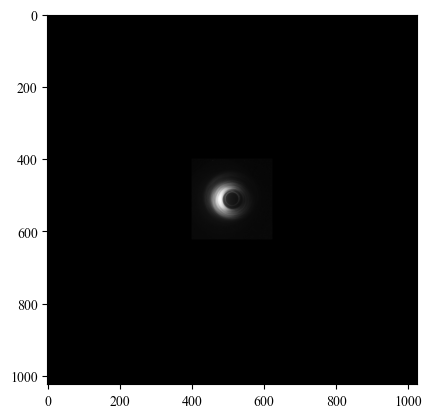

In [39]:
plt.imshow(padded_img, cmap='gray');

In [40]:
angular_pixel_size_input_image = 5e-5
tele_config = dict(
    # physical parameters
    input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
    telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
    wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
    CCD_pixel_count = 1024, show = False,
)
tele_config['input_image'] = padded_img
telescope_simulator = TelescopeSimulator(**tele_config)
show = False
intensity_image = telescope_simulator.get_intensity(padded_img, show=show)
conv_image = telescope_simulator.get_convolved_image(padded_img, intensity_image, show=show)
output_img = telescope_simulator.generate_image(conv_image, show=show)
# output_img = telescope_simulator.generate_image(show=False)

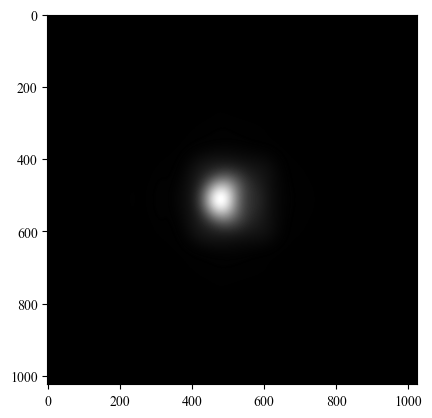

In [41]:
plt.imshow(output_img, cmap='gray');

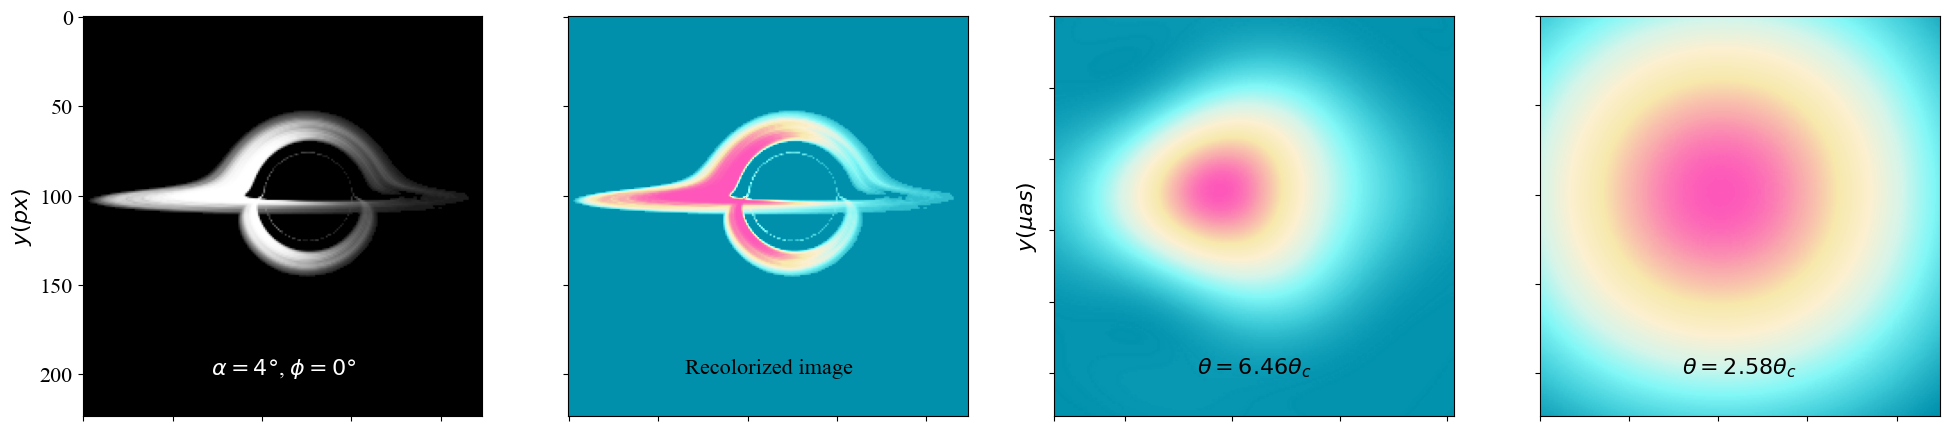

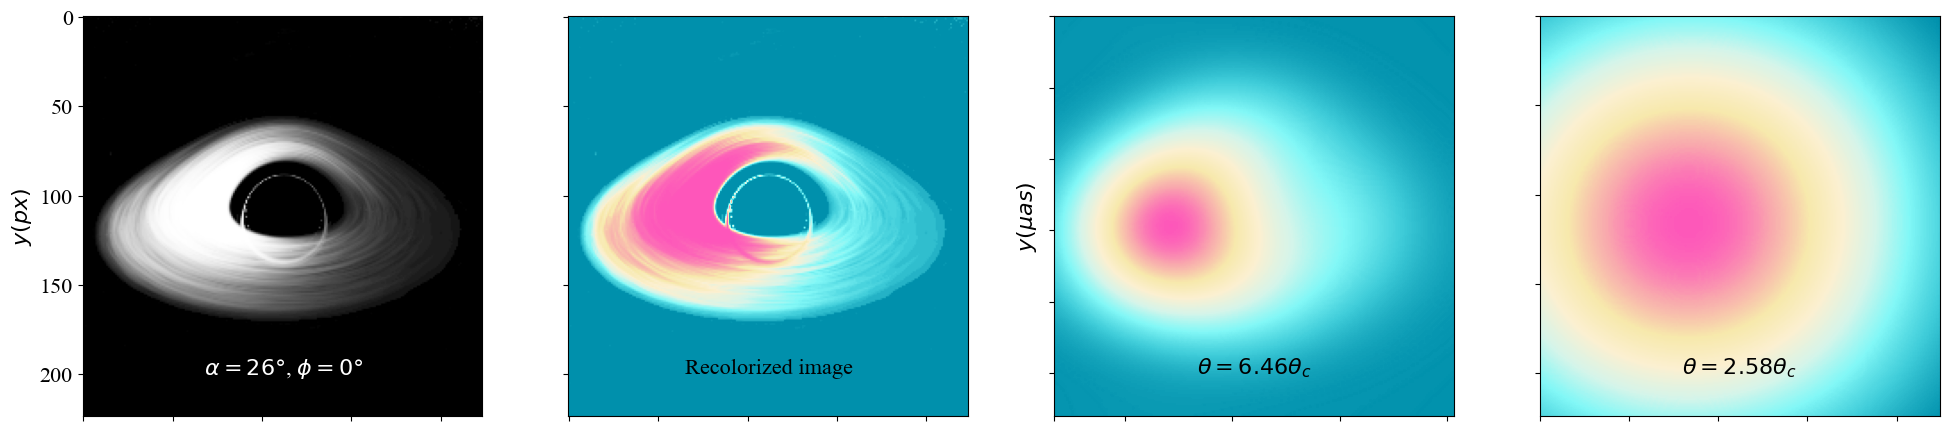

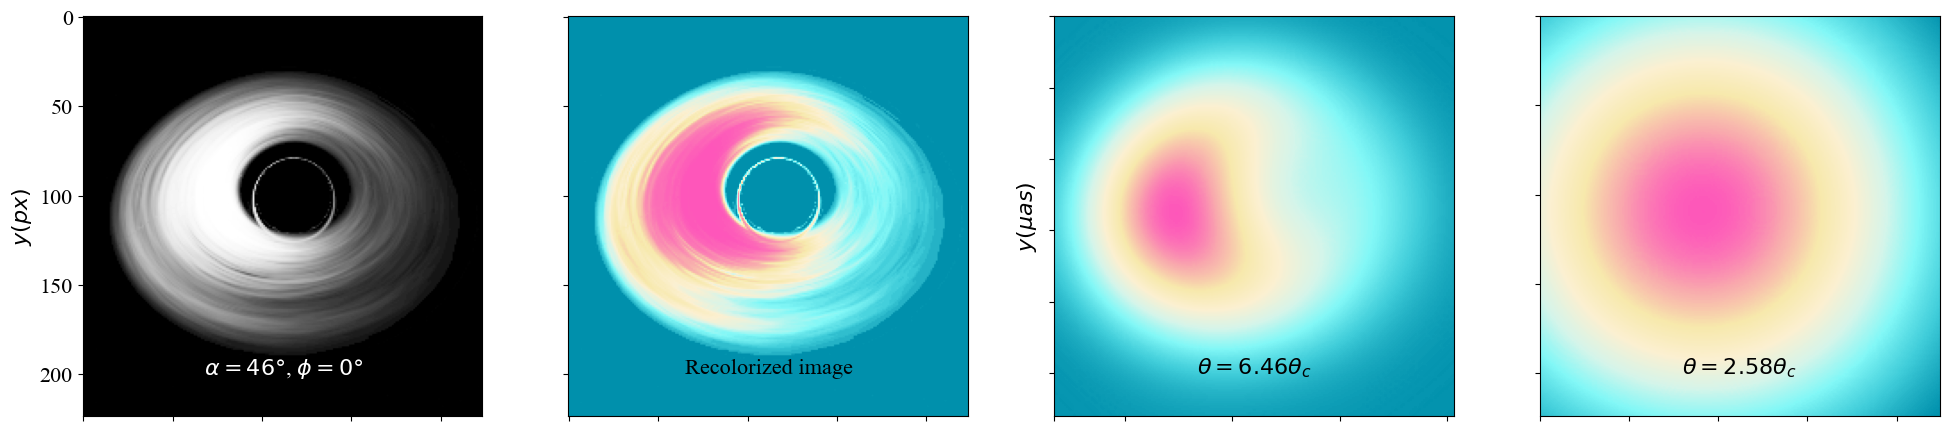

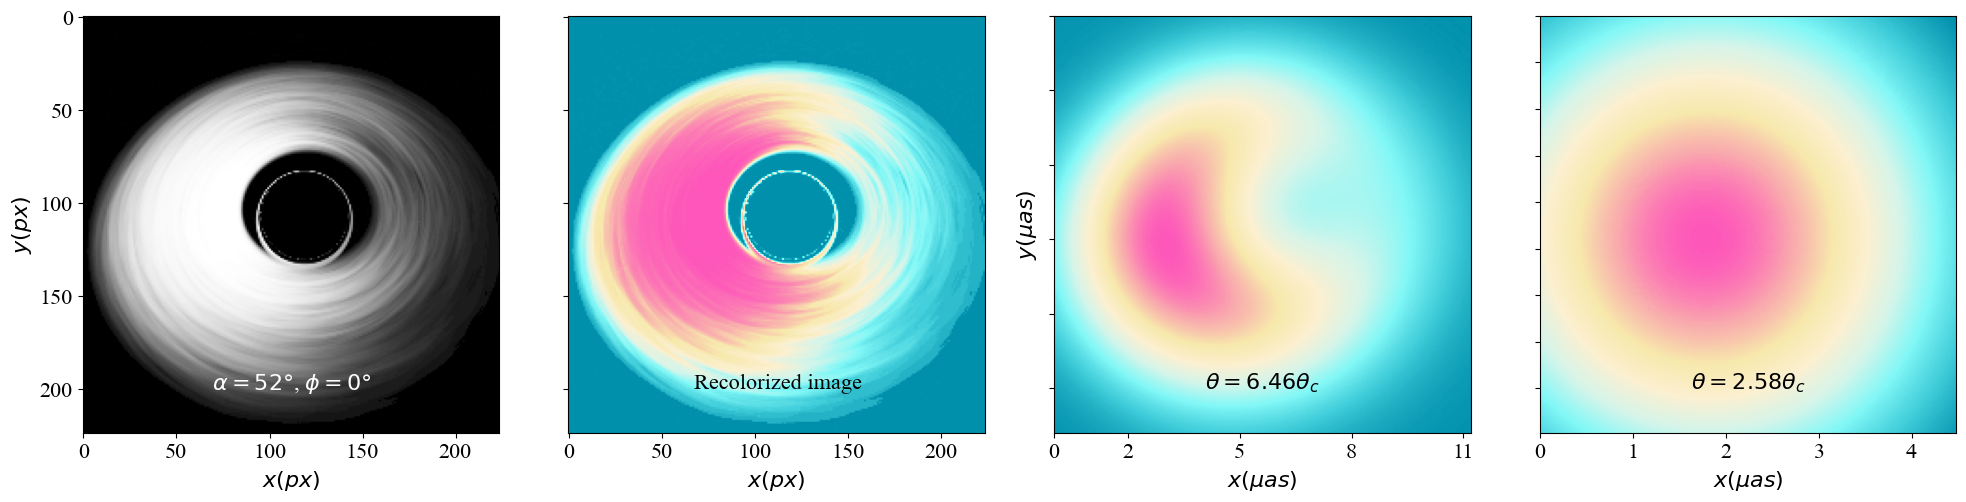

In [63]:
font_size = 16
img_dir = Path('papershow')
img_name = '4.png'
img_names = ['4.png', '26.png', '46.png', '52.png']
for index0, img_name in enumerate(img_names):
    if index0 != 3:
        fig, axes = plt.subplots(1, 4, figsize=(20, 4.5))
    else:
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].set_aspect('equal')
    axes[1].set_aspect('equal')
    axes[2].set_aspect('equal')
    axes[3].set_aspect('equal')
    img_path = img_dir / img_name
    inclination = img_path.stem
    img_test = cv2.imread(str(img_path), 0)
    img_test = cv2.resize(img_test, (init_size, init_size))
    if int(inclination) < 10:
        img_test = np.where(img_test<23, 0, img_test)
    axes[0].imshow(img_test, cmap='gray');
    axes[0].text(init_size // 2 , int(init_size * 0.88), rf'$\alpha={inclination}\degree$, $\phi=0\degree$', fontfamily='Times New Roman',
                color='white', ha='center', va='center')
    axes[1].imshow(img_test, cmap=cmap);
    axes[1].text(init_size // 2 , int(init_size * 0.88), r'Recolorized image', fontfamily='Times New Roman',
                color='black', ha='center', va='center')
    axes[0].set_xticks(np.arange(0, 240, 50))
    axes[1].set_xticks(np.arange(0, 240, 50))
    axes[0].set_yticks(np.arange(0, 240, 50))
    axes[1].set_yticks(np.arange(0, 240, 50))
    axes[0].set_ylabel(r'$y (px)$')
    axes[1].set_yticklabels([])
    if index0 == len(img_names) - 1:
        axes[0].set_xlabel(r'$x (px)$')
        axes[1].set_xlabel(r'$x (px)$')
    else:
        axes[0].set_xticklabels([])
        axes[1].set_xticklabels([])
    theta_c = 3.87e-3
    angular_pixel_size_input_images = [5e-5, 2e-5]
    for index, angular_pixel_size_input_image in enumerate(angular_pixel_size_input_images):
        tele_config = dict(
            input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
            telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
            wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
            CCD_pixel_count = init_size, show = False,
        )
        left = (upper_size - img_test.shape[0]) // 2
        right = upper_size - img_test.shape[0] - left
        top = (upper_size - img_test.shape[1]) // 2
        bottom = upper_size - img_test.shape[1] - top
        padded_img = np.pad(img_test, ((left, right), (top, bottom)), mode='constant')
        tele_config['input_image'] = padded_img
        telescope_simulator = TelescopeSimulator(**tele_config)
        intensity_image = telescope_simulator.get_intensity(padded_img, show=show)
        conv_image = telescope_simulator.get_convolved_image(padded_img, intensity_image, show=show)
        output_img = telescope_simulator.generate_image(conv_image, show=show)
        # output_img = telescope_simulator.generate_image(show=False)
        angular_size_image = angular_pixel_size_input_image * init_size * 1000
        axes[index + 2].imshow(output_img, cmap=cmap, extent=[0, angular_size_image, angular_size_image, 0]);
        # axes[index + 2].set_xticks([])
        factor = angular_pixel_size_input_image * 500 / theta_c
        axes[index + 2].text(angular_size_image / 2 , angular_size_image * 0.88, rf"$\theta={factor:.2f}\theta_c$",
                            color='black', ha='center', va='center')
        axes[index + 2].set_xticks(np.linspace(0, int(angular_size_image), 5, dtype=np.int32))
        if index0 == len(img_names) - 1:
            axes[index + 2].set_xlabel(r'$x (\mu as)$')
        else:
            axes[index + 2].set_xticklabels([])
        axes[2].set_ylabel(r'$y (\mu as)$')
        # axes[2].set_yticks(np.linspace(0, angular_size_image, 5, dtype=np.int32))
        axes[2].set_yticklabels([])
        axes[3].set_yticklabels([])
            # axes[index + 2].set_yticklabels([])
    # fig.tight_layout()
    plt.tight_layout()
    plt.savefig(f'papershow/{inclination}_out.png',dpi=600)
    plt.savefig(f'papershow/{inclination}_out.pdf')
plt.show()

In [ ]:
# img_name = '52.png'
# fig, axes = plt.subplots(1, 4, figsize=(22, 5))
# axes[0].set_aspect('equal')
# axes[1].set_aspect('equal')
# axes[2].set_aspect('equal')
# axes[3].set_aspect('equal')
# img_path = img_dir / img_name
# inclination = img_path.stem
# img_test = cv2.imread(str(img_path), 0)
# img_test = cv2.resize(img_test, (init_size, init_size))
# if int(inclination) < 10:
#     img_test = np.where(img_test<23, 0, img_test)
# axes[0].imshow(img_test, cmap='gray');
# axes[0].text(init_size // 2 , int(init_size * 0.88), rf'$\alpha={inclination}\degree$, $\phi=0\degree$', fontfamily='Times New Roman',
#             color='white', fontsize=fontsize, ha='center', va='center')
# axes[1].imshow(img_test, cmap=cmap);
# axes[1].text(init_size // 2 , int(init_size * 0.88), r'Recolorized image', fontfamily='Times New Roman',
#             color='black', fontsize=fontsize, ha='center', va='center')
# axes[0].set_xlabel('$x (px)$', fontsize=fontsize)
# axes[1].set_xlabel('$x (px)$', fontsize=fontsize)
# theta_c = 3.87e-3
# angular_pixel_size_input_images = [5e-5, 2e-5]
# for index, angular_pixel_size_input_image in enumerate(angular_pixel_size_input_images):
#     tele_config = dict(
#         input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
#         telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
#         wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
#         CCD_pixel_count = init_size, show = False,
#     )
#     left = (upper_size - img_test.shape[0]) // 2
#     right = upper_size - img_test.shape[0] - left
#     top = (upper_size - img_test.shape[1]) // 2
#     bottom = upper_size - img_test.shape[1] - top
#     padded_img = np.pad(img_test, ((left, right), (top, bottom)), mode='constant')
#     tele_config['input_image'] = padded_img
#     telescope_simulator = TelescopeSimulator(**tele_config)
#     intensity_image = telescope_simulator.get_intensity(padded_img, show=show)
#     conv_image = telescope_simulator.get_convolved_image(padded_img, intensity_image, show=show)
#     output_img = telescope_simulator.generate_image(conv_image, show=show)
#     # output_img = telescope_simulator.generate_image(show=False)
#     angular_size_image = angular_pixel_size_input_image * init_size * 1000
#     axes[index + 2].imshow(output_img, cmap=cmap, extent=[0, angular_size_image, angular_size_image, 0]);
#     # axes[index + 2].set_xticks([])
#     factor = angular_pixel_size_input_image * 500 / theta_c
#     axes[index + 2].text(angular_size_image / 2 , angular_size_image * 0.88, rf"$\theta={factor:.2f}\theta_c$",
#                         color='black', fontsize=fontsize, ha='center', va='center')
#     axes[index + 2].set_xlabel('$x (\mu as)$', fontsize=fontsize)
# fig.tight_layout()
# plt.savefig(f'papershow/{inclination}_out.png')
# plt.savefig(f'papershow/{inclination}_out.pdf')
# plt.show()